### Numerical Solvers' Implementations for ODEs 

In [1]:
import matplotlib.pyplot as plt

def plot(func, example, steps):
    plt.figure(figsize=(10,4))
    
    plt.xlim(-4.5, 5.5) 
    plt.ylim(-4.5, 6)
    plt.xticks(np.arange(-5, 5, step=1))
    plt.yticks(np.arange(-4, 6, step=2))

    for step in steps:
        example["step"] = step
        y, t = func(**example)
        plt.plot(t, y, label='$\Delta$ t = ' + str(example['step']) + ' s')

    plt.legend(loc='upper right')
    plt.grid(True)
    plt.xlabel('t (s)', fontsize = 10)
    plt.ylabel('V (V)', fontsize = 10)

    plt.show()

#### Forward (Explicit) Euler

Update rule: $$y_{n+1} = y_{n} + h f(t_n, y_n)$$

In [2]:
import numpy as np
import math

def calculateForwardEuler(func, y_start, step, time_start, time_end):
    # Initialization
    t_max = int((time_end - time_start) / step)
    Y = np.array([y_start] * (t_max + 1))
    T = np.linspace(0, t_max, t_max + 1).astype('int')

    # Iteration
    for t in T[1:]:
        Y[t] = Y[t-1] + step * func((t-1) * step + time_start, Y[t-1])
    return Y, T * step + time_start

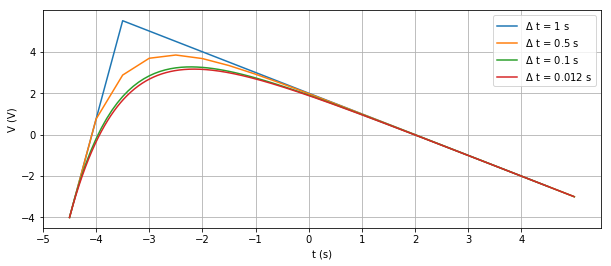

In [3]:
steps = [1, 0.5, 0.1, 0.012]
example = {
    "func"       : lambda t, V: 1 - V - t,
    "y_start"    : -4.0,
    "time_start" : -4.5,
    "time_end"   : 5
}

plot(calculateForwardEuler, example, steps)

#### Heun method
Update rule:
$$\hat{y}_{n+1} = y_{n} + h f(t_n, y_n)$$
$$y_{n+1} = y_{n} + \frac{h}{2} (f(t_n, y_n) + f(t_{n+1}, \hat{y}_{n+1}))$$

In [4]:
def calculateHeun(func, y_start, step, time_start, time_end):
    # Initialization
    t_max = int((time_end - time_start) / step)
    Y = np.array([y_start] * (t_max + 1))
    T = np.linspace(0, t_max, t_max + 1).astype('int')

    # Iteration
    for t in T[1:]:
        y_pred = Y[t-1] + step * func((t-1) * step + time_start, Y[t-1])
        f_diff = func((t-1) * step + time_start, Y[t-1]) + func(t * step + time_start, y_pred)
        Y[t] = Y[t-1] + step / 2 * f_diff
    return Y, T * step + time_start

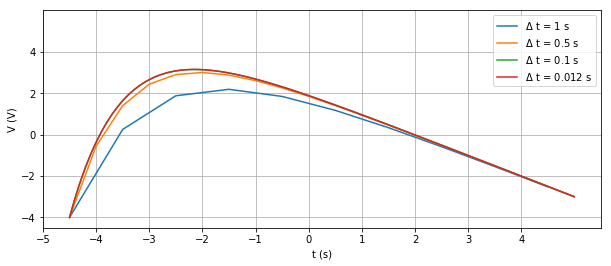

In [5]:
plot(calculateHeun, example, steps)

#### Exponential Euler

Given a differential equation $\frac{dV}{dt} = A(t)V(t) + B(V, t)$

An update rule is $V_{n+1} = V_{n} e^{A(t_n)h} + \frac{B(V_n, t_n)}{A(t_n)} (e^{A(t_n)h} - 1)$

In [6]:
def calculateExponentialEuler(func, y_start, step, time_start, time_end):
    # Initialization
    t_max = int((time_end - time_start) / step)
    Y = np.array([y_start] * (t_max + 1))
    T = np.linspace(0, t_max, t_max + 1).astype('int')

    # --- for a specific example ----
    A = -1
    B = 1 - (T * step + time_start)
    # -------------------------------
    
    # Iteration
    for t in T[1:]:
        Y[t] = Y[t-1] * np.exp(A * step) + B[t-1] / A * (np.exp(A * step) - 1)
    return Y, T * step + time_start

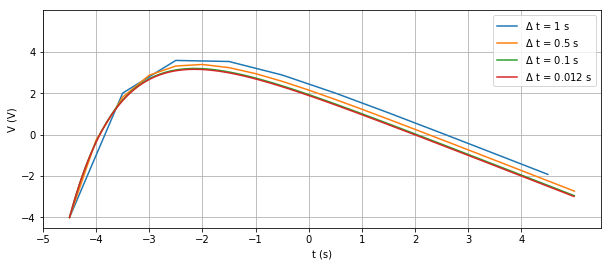

In [7]:
plot(calculateExponentialEuler, example, steps)